In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xtrack as xt
import xobjects as xo
from scipy import optimize as opt

# Exercise 1

Design machine for protons at 20 GeV with parameters:
Circumference = 1000 m
Quadrupole length = 3.0 m
8 FODO cells
dipole length = 5 m, max field = 3 T

each FODO cell is 1000m / 8 cells = 125m/cell


In [2]:
ldipole = 5 #m
lquad = 3 #m
max_field = 3 #T
lring = 1000 #m
p_momentum = 20e9 #GeV
NFODO = 8
lFODO = 125 #m

Ndipoles = 32
beta_max = 300
def fun(f, L, bmax):
    return (2*f*np.sqrt(4*f+L)/np.sqrt(4*f-L)-bmax)**2

f = opt.minimize(fun, x0=100, args=(lFODO,beta_max))['x'][0]
k = 1/f/lquad
k

0.0029527751486421836

In [3]:
env = xt.Environment()
env.vars({'lFODO': lFODO,
          'lquad': lquad,
         'ldipole': ldipole,
         'lring': lring,
         'p_momentum': p_momentum,
         'k1f': k,
         'k1d': -k,
         'Ndipoles': Ndipoles,
         'NFODO': NFODO,
         'angle.mb': 2*np.pi/Ndipoles,
         'k0.mb': 'angle.mb/ldipole'})

env.new('mb', xt.Bend, length='ldipole', k0='k0.mb', h='k0.mb')
env.new('mq', xt.Quadrupole, length='lquad')
env.new('mq.f','mq', k1='k1f')
env.new('mq.d','mq', k1='k1d')

#at -> the end of the object
fodo = env.new_line(components = [
                    env.place('mq.f', at=env['lquad']/2),
                    env.place('mq.d', at=env['lFODO']/2 + env['lquad']/2),
                    env.place('mb', at=env['lFODO']/6 + env['ldipole']/2),
                    env.place('mb', at=env['lFODO']/3 + env['ldipole']/2),
                    env.place('mb', at=env['lFODO']*4/6 + env['ldipole']/2),
                    env.place('mb', at=env['lFODO']*5/6 + env['ldipole']/2),
                    env.new('marker_end', xt.Marker, at=lFODO)
                    ]
                    )
fodo.to_pandas()

,s,element_type,name,isthick,isreplica,parent_name,iscollective,element
0,0.000000,Quadrupole,mq.f,True,False,None,False,"Quadrupole(k1=0.00295, k1s=0, length=3, num_mu..."
1,3.000000,Drift,drift_1,True,False,None,False,Drift(length=17.8)
2,20.833333,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0393, k1=0, h=0.0393, mode..."
3,25.833333,Drift,drift_2,True,False,None,False,Drift(length=15.8)
4,41.666667,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0393, k1=0, h=0.0393, mode..."
5,46.666667,Drift,drift_3,True,False,None,False,Drift(length=15.8)
6,62.500000,Quadrupole,mq.d,True,False,None,False,"Quadrupole(k1=-0.00295, k1s=0, length=3, num_m..."
7,65.500000,Drift,drift_4,True,False,None,False,Drift(length=17.8)
8,83.333333,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0393, k1=0, h=0.0393, mode..."
9,88.333333,Drift,drift_5,True,False,None,False,Drift(length=15.8)


In [4]:
cells = env.new_line(components=[
    env.new('start', xt.Marker),
    fodo,
    env.new('end', xt.Marker),
])

#%% append in cells number_of_FODO times cell
line = env.new_line(components=[env.place(fodo)]*NFODO)

line.to_pandas()

,s,element_type,name,isthick,isreplica,parent_name,iscollective,element
0,0.000000,Quadrupole,mq.f,True,False,None,False,"Quadrupole(k1=0.00295, k1s=0, length=3, num_mu..."
1,3.000000,Drift,drift_1,True,False,None,False,Drift(length=17.8)
2,20.833333,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0393, k1=0, h=0.0393, mode..."
3,25.833333,Drift,drift_2,True,False,None,False,Drift(length=15.8)
4,41.666667,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0393, k1=0, h=0.0393, mode..."
...,...,...,...,...,...,...,...,...
100,963.333333,Drift,drift_5,True,False,None,False,Drift(length=15.8)
101,979.166667,Bend,mb,True,False,None,False,"Bend(length=5, k0=0.0393, k1=0, h=0.0393, mode..."
102,984.166667,Drift,drift_6,True,False,None,False,Drift(length=15.8)
103,1000.000000,Marker,marker_end,False,False,None,False,Marker(_dummy=0)


In [5]:
line.particle_ref = xt.Particles(p0c=20e9, #eV
                                 q0=1, mass0=xt.PROTON_MASS_EV)
context = xo.ContextCpu()
line.build_tracker(_context=context)

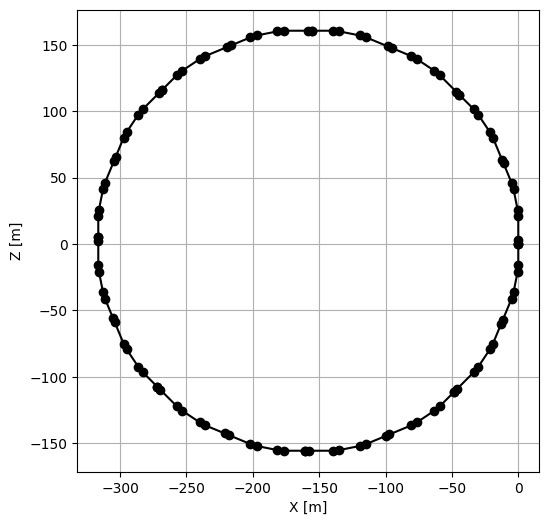

In [6]:
mySurvey = line.survey()
#mySurvey = mySurvey.rows[r'^(mq|mb).*']
fig, ax = plt.subplots(figsize=(9, 6))
plt.plot(mySurvey.X, mySurvey.Z, 'o-', label="x", c="k")
plt.axis('square')
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.grid()
# %%
myTwiss= line.twiss(method='4d')

(-0.05, 0.05)

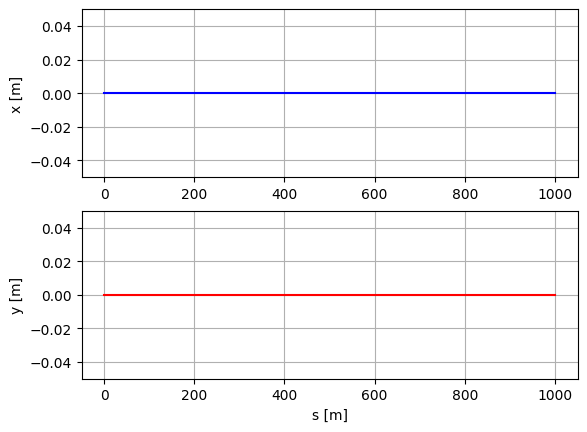

In [7]:
plt.subplot(211)
plt.plot(myTwiss.s,myTwiss.x,'b',label='x')
plt.ylabel('x [m]')
plt.grid()
plt.ylim(-0.05,0.05)

plt.subplot(212)
plt.plot(myTwiss.s,myTwiss.y,'r',label='y')
plt.xlabel('s [m]')
plt.ylabel('y [m]')
plt.grid()
plt.ylim(-0.05,0.05)

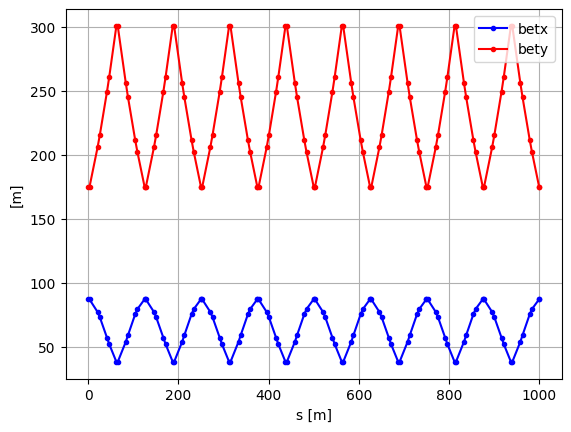

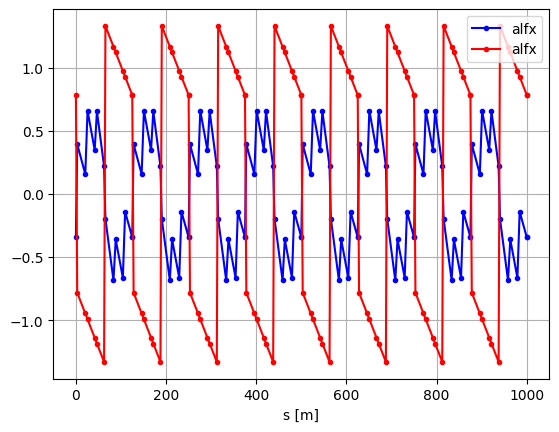

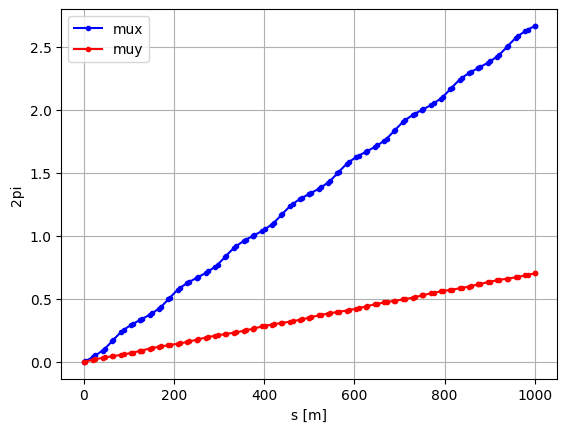

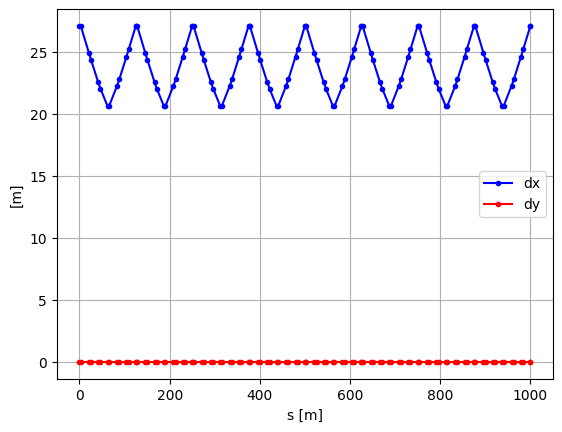

In [8]:
def plot_me(myTwiss):
    plt.plot(myTwiss.s,myTwiss.betx,'.-b', label='betx')
    plt.plot(myTwiss.s,myTwiss.bety,'.-r', label='bety')
    plt.ylabel('[m]')
    plt.xlabel('s [m]')
    plt.grid()
    plt.legend()

    plt.figure()
    plt.plot(myTwiss.s,myTwiss.alfx,'.-b', label='alfx')
    plt.plot(myTwiss.s,myTwiss.alfy,'.-r', label='alfx')
    plt.xlabel('s [m]')
    plt.ylabel('')
    plt.grid()
    plt.legend()

    plt.figure()
    plt.plot(myTwiss.s,myTwiss.mux,'.-b', label='mux')
    plt.plot(myTwiss.s,myTwiss.muy,'.-r', label='muy')
    plt.xlabel('s [m]')
    plt.ylabel('2pi')
    plt.grid()
    plt.legend()

    plt.figure()
    plt.plot(myTwiss.s,myTwiss.dx,'.-b', label='dx')
    plt.plot(myTwiss.s,myTwiss.dy,'.-r', label='dy')
    plt.xlabel('s [m]')
    plt.ylabel('[m]')
    plt.grid()
    plt.legend()
plot_me(myTwiss)